In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import wavepacket as wp

In [2]:
# 1. Define the grid on which we run the calculation
degree_of_freedom = wp.PlaneWaveDof(-15, 15, 128)
grid = wp.Grid(degree_of_freedom)

In [3]:
# 2. Set up the initial state
psi_left = wp.build_product_wave_function(grid,
                                          wp.Gaussian(-3, rms = math.sqrt(0.5)))
psi_right = wp.build_product_wave_function(grid,
                                           wp.Gaussian(3, rms = math.sqrt(0.5)))

psi0 = math.sqrt(0.5) * (psi_left + psi_right)

In [4]:
# 3. Set up the equation of motion
hamiltonian = wp.CartesianKineticEnergy(grid, dof_index=0, mass=1.0)

equation = wp.SchroedingerEquation(hamiltonian)

In [5]:
# 4. Set up the solver
solver = wp.OdeSolver(equation, dt=math.pi/5)

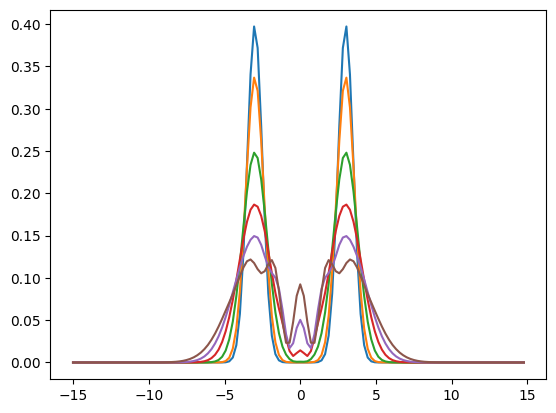

In [12]:
# 5. Run the propagation
for t, psi in solver.propagate(psi0, t0=0.0, num_steps=5):
    # TODO: Better and more convenient plotting
    plt.plot(grid.dofs[0].dvr_points, wp.dvr_density(psi))

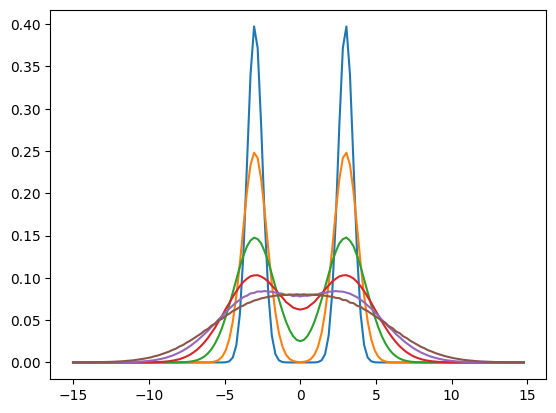

In [11]:
# We can propagate an incoherent addition with minimal changes:
# - we need to construct a density operator as incoherent superposition
rho0 = 0.5 * (wp.pure_density(psi_left) + wp.pure_density(psi_right))

# - our equation of motion is of course different
liouvillian = wp.CommutatorLiouvillian(hamiltonian)
solver2 = wp.OdeSolver(liouvillian, dt = math.pi/5)

# - everything else can just be copied
for t, rho in solver2.propagate(rho0, t0=0.0, num_steps=5):
    plt.plot(grid.dofs[0].dvr_points, wp.dvr_density(rho))